In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
sales_df = pd.read_csv(Path('../Resources/WMT_Weekly_Sales_rev.csv'))
sales_df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Rev_Date,index_id,Month,Year,Week
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106,5/2/2010,1-2010-05-02,5,2010,17
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106,12/2/2010,1-2010-12-02,12,2010,48
2,1,2/19/2010,1611968.17,0,39.93,2.514,211.289143,8.106,2/19/2010,1-2010-02-19,2,2010,7
3,1,2/26/2010,1409727.59,0,46.63,2.561,211.319643,8.106,2/26/2010,1-2010-02-26,2,2010,8
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106,5/3/2010,1-2010-05-03,5,2010,18
5,1,12/3/2010,1439541.59,0,57.79,2.667,211.380643,8.106,12/3/2010,1-2010-12-03,12,2010,48
6,1,3/19/2010,1472515.79,0,54.58,2.720,211.215635,8.106,3/19/2010,1-2010-03-19,3,2010,11
7,1,3/26/2010,1404429.92,0,51.45,2.732,211.018042,8.106,3/26/2010,1-2010-03-26,3,2010,12
8,1,2/4/2010,1594968.28,0,62.27,2.719,210.820450,7.808,2/4/2010,1-2010-02-04,2,2010,5
9,1,9/4/2010,1545418.53,0,65.86,2.770,210.622857,7.808,9/4/2010,1-2010-09-04,9,2010,35


In [3]:
sales_df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Rev_Date         object
index_id         object
Month             int64
Year              int64
Week              int64
dtype: object

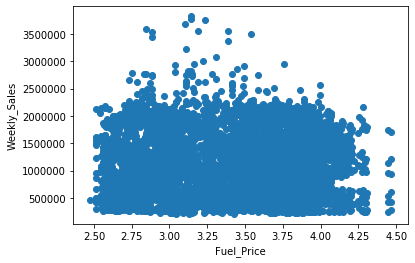

In [4]:
plt.scatter(sales_df.Fuel_Price, sales_df.Weekly_Sales)
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.show()

In [5]:
y = sales_df["Weekly_Sales"]
X = sales_df.drop(columns=["Weekly_Sales","Date","Rev_Date","index_id"]) 

In [6]:
# # format the data to meet the requirements of the Scikit-learn library
# X = sales_df.Fuel_Price.values.reshape(-1, 1)

In [7]:
 X[:5]

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,0,42.31,2.572,211.096358,8.106,5,2010,17
1,1,1,38.51,2.548,211.242170,8.106,12,2010,48
2,1,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,0,46.50,2.625,211.350143,8.106,5,2010,18


In [27]:
r_temp = np.corrcoef(X.Temperature, y)
r_temp

array([[ 1.        , -0.06381001],
       [-0.06381001,  1.        ]])

In [28]:
r_holi = np.corrcoef(X.Holiday_Flag, y)
r_holi

array([[1.        , 0.03689097],
       [0.03689097, 1.        ]])

In [29]:
r_fuel = np.corrcoef(X.Fuel_Price, y)
r_fuel

array([[1.        , 0.00946379],
       [0.00946379, 1.        ]])

In [30]:
r_cpi = np.corrcoef(X.CPI, y)
r_cpi

array([[ 1.        , -0.07263416],
       [-0.07263416,  1.        ]])

In [31]:
r_unemp = np.corrcoef(X.Unemployment, y)
r_unemp

array([[ 1.        , -0.10617609],
       [-0.10617609,  1.        ]])

In [32]:
r_month = np.corrcoef(X.Month, y)
r_month

array([[1.        , 0.06753523],
       [0.06753523, 1.        ]])

In [33]:
r_week = np.corrcoef(X.Week, y)
r_week

array([[1.        , 0.06610484],
       [0.06610484, 1.        ]])

In [34]:
r_year = np.corrcoef(X.Year, y)
r_year

array([[ 1.        , -0.01837754],
       [-0.01837754,  1.        ]])

In [35]:
r_store = np.corrcoef(X.Store, y)
r_store

array([[ 1.        , -0.33533201],
       [-0.33533201,  1.        ]])

In [8]:
X.shape

(6435, 9)

In [9]:
X.dtypes

Store             int64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Month             int64
Year              int64
Week              int64
dtype: object

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
X_train.shape

(4826, 9)

In [12]:
X_test.shape

(1609, 9)

In [13]:
y_train.shape

(4826,)

In [14]:
y_test.shape

(1609,)

In [15]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
#  sklearn.linear_model's => LinearRegression class. 
# LinearRegression class is like a template that contains the algorithms 

model=LinearRegression()

In [17]:
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# X is indepaendent variaable provide number of prediction
y_pred=model.predict(X_test_scaled)
print(y_pred)

[1454090.00958145 1102274.96429005 1176495.51447722 ...  984368.72838373
 1302571.30357656  802214.13594909]


In [19]:
# Predict outcomes for test data set

predictions=pd.DataFrame({"Prediction": y_pred, "Actual": y_test})
predictions

,Prediction,Actual
447,1.454090e+06,1870619.23
2196,1.102275e+06,448391.99
3253,1.176496e+06,1272948.27
2873,1.000270e+06,744969.42
712,1.285005e+06,325345.41
...,...,...
1331,1.367128e+06,2411790.21
5007,7.071060e+05,470281.03
2997,9.843687e+05,667151.46
2429,1.302571e+06,957356.84


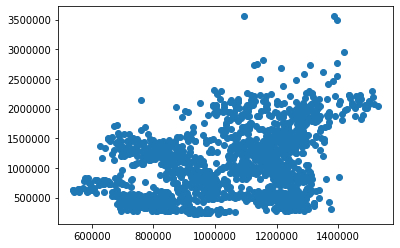

In [20]:
plt.scatter(predictions.Prediction, predictions.Actual)

In [21]:
rmse = np.sqrt(mean_squared_error(predictions.Actual, predictions.Prediction))
rmse

529802.0649517294

In [22]:
mae = mean_absolute_error(predictions.Actual, predictions.Prediction)
mae   

440285.20259857585

In [23]:
r2 = r2_score(predictions.Actual, predictions.Prediction)
r2

0.1447931750333451